<CENTER>
    <h1> Geospatial Data Science Applications: GEOG 4/590</h1>
    <h3>Jan 31, 2022</h3>
    <h2>Lecture 5: Machine learning</h2>
    <img src="images/coding-computer-programming.jpeg" width="300"/>
    <h3>Johnny Ryan: jryan4@uoregon.edu</h3>
</CENTER>

## Content of this lecture

* Crash course on machine learning for environmental applications 
<br>
<br>
* Introduce `scikit-learn` for machine learning in Python
<br>
<br>
* Learn how to represent data so a program can learn from it
<br>
<br>
* Learn how to evaluate a machine learning model
<br>
<br>
* Background for this week's lab

## What is machine learning?

* The goal of machine learning is use **input data** to make **useful predictions** on **never-before-seen data**


* Machine learning is **part** of artificial intelligence, but not the only part



<img src="images/ml_schematic.jpg" alt="https://vas3k.com/blog/machine_learning/" width="500"/>

## Input data

* Machine learning starts with a **labelled dataset**



* A **label** is the thing we're predicting (e.g. `y` variable in linear regression)



* For example, house price, river discharge, land cover etc.

## Input data

* It's tough to collect a good collection of data (time-consuming, expensive) 


* These datasets are therefore **extremely valuable**

<img src="images/captcha.jpeg" alt="https://onezero.medium.com/why-captcha-pictures-are-so-unbearably-depressing-20679b8cf84a" width="200"/>

## Features

* An input variable (e.g. the `x` variable in linear regression)


* A simple dataset might use a **one or two features** while a more complex dataset could have **thousands of features**


* In our river discharge example - features could include precipitation, snow depth, soil moisture


## Algorithms

* There are many (e.g. naive bayes, decision trees, neural network etc.)


* Performance of algorithm dependent on type of problem


* Just remember: garage in, garbage out

<img src="images/ml_types.jpg" alt="https://vas3k.com/blog/machine_learning/" width="600"/>

<img src="images/classical_ml.jpg" alt="https://vas3k.com/blog/machine_learning/" width="600"/>

## Supervised learning

* Training data is already **labeled** and we teach the machine to learn from these examples


* Supervised learning can used to predict a **category** (classification) or predict a **number** (regression) 

## Classification

* Split things into groups based on their **features**


* Examples include:
    * Land cover
    * Flood risk
    * Sentiment analysis

* Popular algorithms include:
    * Naive Bayes
    * Decision Trees
    * K-Nearest Neighbours
    * Support Vector Machine
    
<img src="images/classification.jpg" alt="https://vas3k.com/blog/machine_learning/" width="300"/>

## Regression

* Draw a line through these dots




## Example: California housing dataset

* A classic machine learning example dataset derived from the 1990 U.S. Census


* **Labels** = house prices at the block group level (a block group typically has a population of 600 to 3,000 people)


* **Features** = longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income




In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Read dataset
df = pd.read_csv('data/california_house_prices.csv')

# Examine dataset (each row represents one block group)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


## Check data

In [5]:
# Check for NaN values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


## Check data

In [6]:
# Check summary statistics
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Visualize data

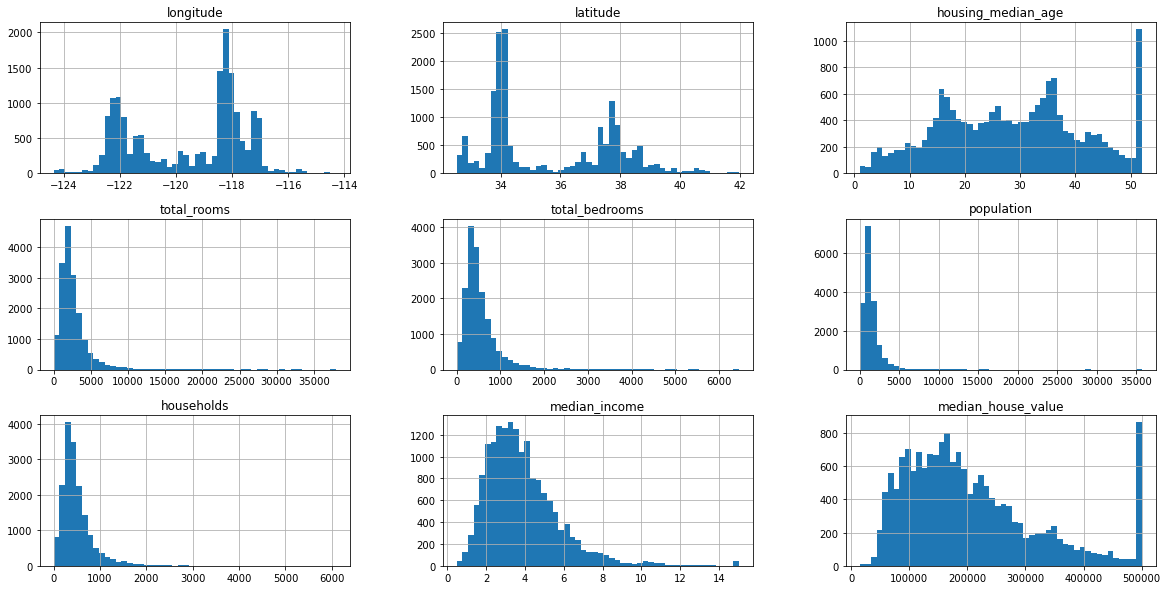

In [10]:
# Plot histogram
_ = df.hist(bins=50 , figsize=(20, 10))

## Correlation analysis

* It is always useful to compute correlation coeffcients (e.g.Pearson's r) between the labels (i.e. `median_house_value`) and features.

In [10]:
# Compute correlation matrix
corr_matrix = df.corr()

# Display just house value correlations
corr_matrix["median_house_value"].sort_values(ascending= False)

median_house_value    1.000000
median_income         0.691871
total_rooms           0.130991
housing_median_age    0.106758
households            0.061031
total_bedrooms        0.045783
population           -0.027850
longitude            -0.044982
latitude             -0.144917
Name: median_house_value, dtype: float64

### Warning

* Just remember that correlation coefficients only measure linear correlations ("if `x` goes up, then `y` generally goes up/down").


* They may completely miss nonlinear relationships (e.g., "if `x` is close to zero then `y` generally goes up").


<img src="images/correlations.png" alt="https://www.kaggle.com/aakashjoshi123/o-reilly-solution-with-my-observations-notebook" width="600"/>

## Feature scaling

* Machine Learning algorithms don’t perform well when the input numerical attributes have very **different scales**.


* We often **scale** (or normalize) our features before training the model (e.g. min-max scaling or standardization).


* **Min-max method** scales values so that they end up ranging from 0 to 1


* **Standardization** scales values so that the they have mean of 0 and unit variance.


<img src="images/scaling.png" alt="https://www.kaggle.com/aakashjoshi123/o-reilly-solution-with-my-observations-notebook" width="800"/>

In [19]:
# Import library
from sklearn.preprocessing import StandardScaler

# Define feature list
feature_list =  ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 
                 'population', 'households', 'median_income']

# Define features and labels 
X = df[feature_list]
y = df['median_house_value']

# Standarize data (not strictly necessary for Random Forests but good practice)
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X)

## Split data in training and testing subsets


In [28]:
from sklearn.model_selection import train_test_split

# Split data 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Multiple linear regression

A very simple supervised algorithm that fits a linear model to our data using a least squares approach. 



In [29]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [31]:
from sklearn.metrics import mean_squared_error

# Predict test labels
predictions = lin_reg.predict(X_test)

# Compute mean-squared-error
lin_mse = mean_squared_error(y_test, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68078.32552452621

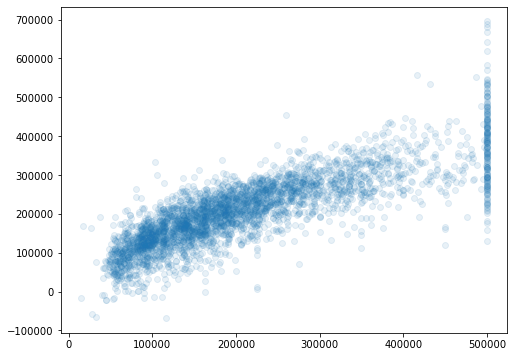

In [36]:
# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_test, predictions, alpha=0.1)

In [37]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [40]:
# Predict test labels
predictions = tree_reg.predict(X_test)

# Compute mean-squared-error
tree_mse = mean_squared_error(y_test, predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

69640.72218466763

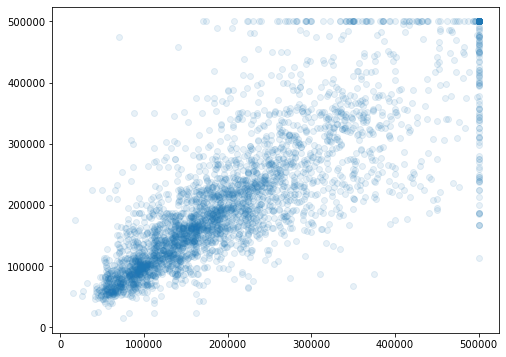

In [41]:
# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_test, predictions, alpha=0.1)

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = [
    
    {'n_estimators' : [3 , 10 , 30], 'max_features' : [2 , 4 , 6 , 8]},
    {'bootstrap':[False] ,'n_estimators' : [3 , 10 ] , "max_features" : [2 ,3 ,4 ]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg , param_grid , cv = 5 , scoring = 'neg_mean_squared_error' , return_train_score= False)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [43]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_

In [44]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64009.26761360676 {'max_features': 2, 'n_estimators': 3}
56128.93508614028 {'max_features': 2, 'n_estimators': 10}
53104.78434598545 {'max_features': 2, 'n_estimators': 30}
60666.59867436996 {'max_features': 4, 'n_estimators': 3}
52182.82851351468 {'max_features': 4, 'n_estimators': 10}
50298.65151458348 {'max_features': 4, 'n_estimators': 30}
59995.11409881968 {'max_features': 6, 'n_estimators': 3}
52125.144675733216 {'max_features': 6, 'n_estimators': 10}
50531.014825862636 {'max_features': 6, 'n_estimators': 30}
58777.90966433695 {'max_features': 8, 'n_estimators': 3}
52119.12686636181 {'max_features': 8, 'n_estimators': 10}
50313.70913447412 {'max_features': 8, 'n_estimators': 30}
62016.03779576189 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54519.32963630994 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59671.255939053975 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52444.93531542631 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [46]:
final_model = grid_search.best_estimator_
predictions= final_model.predict(X_test)
final_mse = mean_squared_error(y_test , predictions)
final_rmse = np.sqrt(final_mse)

print(final_rmse)

49564.57501692518


### Train machine learning model

We will now **train** a machine learning model to predict **max. annual discharge** using the predictor variables. We don't want to use all our data to train the model because otherwise we will have no way of evaluating the performance of the model. So we split our data into **two subsets**, one for training and one for testing. `scikit-learn` makes this step very simple. Here we are going to train the model on 80% of the data and keep 20% back for testing. 

In [21]:
# Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Next we define a classifer. In this case, we will use a Random Forests Regressor with 100 trees. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [22]:
# Define classifier
classifier = RandomForestRegressor(n_estimators=100)

Now we train the model by passing our training set to the `fit` method.

In [23]:
# Train classifier
classifier.fit(X_train, y_train)

RandomForestRegressor()

That's it. Now the model is trained and we can use the `classifier` object to `predict` new values. We will first predict the discharge using predictor variables in our testing dataset.

In [24]:
# Predict
predictions = classifier.predict(X_test)